In [1]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'..')


In [2]:
import numpy as np
import streamlit as st
from copy import deepcopy as dc
import pandas as pd
from pathlib import Path
from src.label_checker_automata import LabelCheckerAutomata
from src.caption import Caption
import src.utils as utils

2023-03-13 09:45:36.486 INFO    numexpr.utils: Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-03-13 09:45:36.488 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [3]:
data_dir = Path("../data/new/images")

labels = []

for image_fn in data_dir.iterdir():
    if image_fn.suffix == ".jpg" and not image_fn.name.startswith("."):
        labels.append("_".join(image_fn.stem.split("_")[1:]))

df = pd.DataFrame.from_dict({
    "label": labels,
})
df

,label
0,S AOGB 3 annulets & chief ch. lion isst & label
1,G A cross potenty
2,lion; lion q.f. {OS; BO}
3,O B lion rampant
4,"fess; eagle doubleheaded; =; = {OS, SA}"
...,...
577,"cross; gonfanon; =; = {GA, AG}"
578,B A lion rampant
579,A G eagle cr.
580,G O lion rampant


In [4]:
root_folder_images = "../data/new/"

train_annotation_file = root_folder_images + '/train_captions_psumsq.txt'
val_annotation_file  = root_folder_images + '/val_captions_psumsq.txt'
test_annotation_file  = root_folder_images + '/test_captions_psumsq.txt'

df1 = pd.read_csv(train_annotation_file)
print("There are {} train images".format(len(df1)))

df2 = pd.read_csv(val_annotation_file)
print("There are {} val images".format(len(df2)))

df3 = pd.read_csv(test_annotation_file)
print("There are {} test images".format(len(df3)))


There are 87 train images
There are 29 val images
There are 29 test images


In [5]:
def count_charges(df):
    train_captions = df['caption']
    count_lion, count_cross, count_eagle = 0,0,0
    
    for c in train_captions:
        if "lion" in c:
            count_lion+=1
        if "eagle" in c:
            count_eagle+=1
        if "cross" in c:
            count_cross+=1
        
    print("Lion count:", count_lion) 
    print("Eagle count:", count_eagle) 
    print("Cross count:", count_cross)
    
    print("--------------------------------------")
    
    print("Lion ration:", round(count_lion/len(train_captions), 2))
    print("Eagle ration:", round(count_eagle/len(train_captions), 2)) 
    print("Cross ration:", round(count_cross/len(train_captions), 2)) 
    
    print("--------------------------------------")
    
    df = pd.DataFrame({'mass': [count_lion, count_eagle, count_cross],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['count_lion', 'count_eagle', 'count_cross'])
    plot = df.plot.pie(y='mass', figsize=(5, 5))
    
    print("--------------------------------------")

    return count_lion, count_eagle, count_cross


Train
Lion count: 34
Eagle count: 27
Cross count: 26
--------------------------------------
Lion ration: 0.39
Eagle ration: 0.31
Cross ration: 0.3
--------------------------------------
--------------------------------------


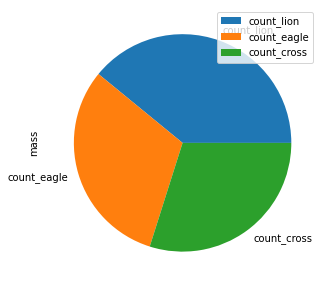

In [6]:
print("Train")
count_lion, count_eagle, count_cross = count_charges(df1)


Val
Lion count: 15
Eagle count: 9
Cross count: 5
--------------------------------------
Lion ration: 0.52
Eagle ration: 0.31
Cross ration: 0.17
--------------------------------------
--------------------------------------


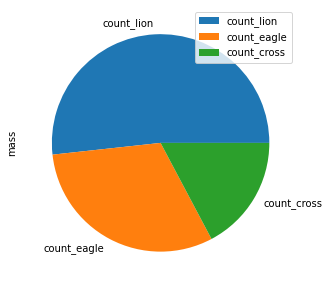

In [7]:
print("Val")
count_lion, count_eagle, count_cross = count_charges(df2)


Test
Lion count: 13
Eagle count: 9
Cross count: 7
--------------------------------------
Lion ration: 0.45
Eagle ration: 0.31
Cross ration: 0.24
--------------------------------------
--------------------------------------


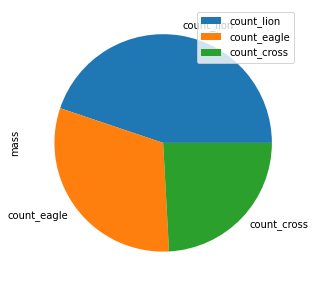

In [8]:
print("Test")

count_lion, count_eagle, count_cross = count_charges(df3)
